<a href="https://colab.research.google.com/github/gohibi/eli/blob/eli/elijakelab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chi2
import math

les donnees initiales 


In [12]:
X =pd.Series([75, 88, 74, 80, 76, 82, 86, 76, 93, 74, 72, 82, 71,
82, 87, 81, 87, 79, 78, 87, 82, 87, 82, 74, 77, 83,
86, 85, 86, 76, 81, 86, 76, 71, 80, 85, 73, 75, 88,
89, 84, 85, 85, 81, 82, 85, 83, 76, 87, 87, 76, 76,
73, 78, 87, 80, 78, 72, 83, 91, 82, 93, 76, 83, 80,]) 

premier quantile

In [13]:
Q1=np.quantile(X,0.25)
print(f'Q1={Q1}')

Q1=76.0


troisieme quantile

In [14]:
Q3=np.quantile(X,0.75)
print(f'Q3={Q3}')


Q3=86.0


intervalle interquantile

In [15]:
IQR=Q3 - Q1
print(f'IQR={IQR}')

IQR=10.0


remove outliers

In [16]:
X= X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR)))] #remove outlier from quartile

In [17]:
n=len(X)
Xmax = np.max(X)
Xmin=np.min(X)
R =Xmax - Xmin #Размах
k= (np.sqrt(n)).round(2) #Часто
h=(R/k).round(2)  #длина formule de h=R/k. la fonction ROUND est une fonction pour arrondi les entiers 
x0 =(Xmin - 0.5*h).round(2) #x0=Xmin-0.5*h
xk = (Xmax + 0.5*h).round(2)#xk=Xmax+0.5*h

In [ ]:
print(f'n={n}\n Xmax={Xmax}\n Xmin={Xmin}\n R={R}\n k={k}\n h={h}\n x0={x0}\n xk={xk}\n')

n=65
 Xmax=93
 Xmin=71
 R=22
 k=8.06
 h=2.73
 x0=69.64
 xk=94.36



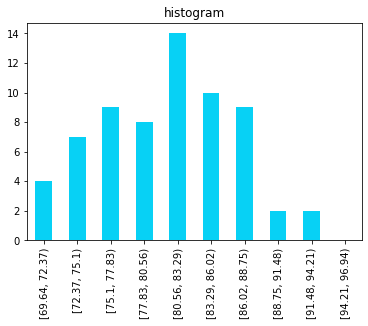

In [ ]:
bin_range = np.arange(x0 , xk+h , h)
out, bins  = pd.cut(X, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(color='#07d1f5', title='histogram')

In [ ]:
display(out.value_counts(sort=False, ascending=False))

[69.64, 72.37)     4
[72.37, 75.1)      7
[75.1, 77.83)      9
[77.83, 80.56)     8
[80.56, 83.29)    14
[83.29, 86.02)    10
[86.02, 88.75)     9
[88.75, 91.48)     2
[91.48, 94.21)     2
[94.21, 96.94)     0
dtype: int64

In [ ]:
data={'xi':[71,73.73,76.46,79.19,81.92,84.65,87.38,90.11,92.84,95.57],
      'ni':[4,7,9,8,14,10,9,2,2,0]} # xi cest la moyenne de lintervalle et ni c leffectif de lintervale 
df =pd.DataFrame(data) #Дискретный вариационный ряд
display(df)

,xi,ni
0,71.00,4
1,73.73,7
2,76.46,9
3,79.19,8
4,81.92,14
5,84.65,10
6,87.38,9
7,90.11,2
8,92.84,2
9,95.57,0


Text(0.5, 1.0, 'Polygon')

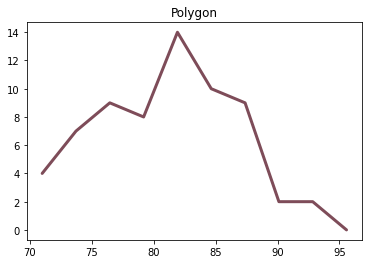

In [ ]:
_,axe = plt.subplots()
axe.plot(df['xi'], df['ni'], color='#470012', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
axe.set_title('Polygon')

In [ ]:
data_d ={'xi':[71,73.73,76.46,79.19,81.92,84.65,87.38,90.11,92.84,95.57],
      'ni':[4,7,9,8,14,10,9,2,2,0],
       'fi':[0.06,0.11,0.14,0.12,0.22,0.15,0.14,0.03,0.03,0],
       'cfi':[0.06,0.17,0.31,0.43,0.65,0.8,0.94,0.97,1,1]}
df1 =pd.DataFrame(data_d)
display(df1)

,xi,ni,fi,cfi
0,71.00,4,0.06,0.06
1,73.73,7,0.11,0.17
2,76.46,9,0.14,0.31
3,79.19,8,0.12,0.43
4,81.92,14,0.22,0.65
5,84.65,10,0.15,0.80
6,87.38,9,0.14,0.94
7,90.11,2,0.03,0.97
8,92.84,2,0.03,1.00
9,95.57,0,0.00,1.00


Text(0.5, 1.0, 'cumulate')

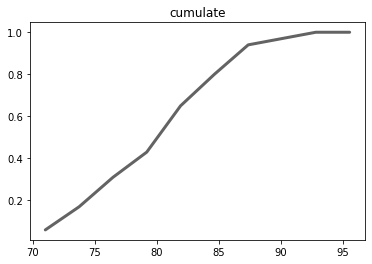

In [ ]:
_,axe = plt.subplots()
axe.plot(df1['xi'], df1['cfi'], color='#212121', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
axe.set_title('cumulate')

In [ ]:
Xmode=X.mode(dropna=True)    #моду
md_X=X.median(skipna=True)   #медиану
mean_X=X.mean()              #выборочную среднюю
var_X=X.var()                #выборочную дисперсию
std_X=X.std()                #выборочное среднее квадратическое отклонение
cv_X=std_X/mean_X*100        #коэффициент вариации
skew_X=X.skew(skipna=True)   #асимметрию
kurt_X=X.kurt()              #эксцесс

In [ ]:
print(f'Mode={Xmode}\n ') #mode est egale a 76
print(f'Median={md_X}\n ')
print(f'Moyenne={mean_X}\n')
print(f'Variance={var_X}\n')
print(f'Std ={std_X} \n') 
print(f'Coeffiecient Variation = {cv_X}\n ') #cherche aussi sa signification 
print(f'Asymetrie = {skew_X}\n ') #cherche a savoir si c asymetrie a droite ou a gauche 
print(f'Express = {kurt_X}') # de meme pour celui la

Mode=0    76
dtype: int64
 
Median=82.0
 
Moyenne=81.15384615384616

Variance=30.819711538461554

Std =5.551550372505104 

Coeffiecient Variation = 6.84077297085937
 
Asymetrie = 0.0039004352711844614
 
Express = -0.8026946873478229


Построить доверительные интервалы для истинного значения измеряемой величины и среднего квадратического отклонения генеральной совокупности

Для математического ожидания

In [ ]:
s=X.std() #ecart type
xba=X.mean() #moyenne
gamma=0.95
t=1.997137908   #=TINV(0,05; 65) по экселе  // 65 est effectif de ta serie
left_m=round(xba-t*(s/math.sqrt(n)),4)
right_m=round(xba+t*(s/math.sqrt(n)),4)
print('Confidence interval of mathematical expectation ', left_m ,'< m <', right_m)

Confidence interval of mathematical expectation  79.7786 < m < 82.529


для среднего квадратического отклонения

In [ ]:
ki1_right=43.77595   # CHIINV(1,95/2;64) по эксель formule du khideux si tu veux comprendre 
ki2_left=54.04233   # CHIINV(0,05/2;64) по эксель
sigm_left=(((n-1)*(s*s))/ki2_left)
sigm_right=(((n-1)*(s*s))/ki1_right)
print('Confidence interval of standard deviation',round(sigm_left,3) ,'< s^2 <', round(sigm_right,3))




Confidence interval of standard deviation 36.498 < s^2 < 45.058


In [ ]:
#VOIR LE POWERPOINT DU PREMIER LEKSIA TU VAS COMPRENDRE BEAUCOUP DU LAB

**LAB2**

**1.Построить эмпирическую (полигон) и теоретическую (нормальную) кривую распределения.**

In [4]:
data = pd.DataFrame(pd.read_excel("eli.xlsm" , sheet_name="dan"))
display(data)

,xi,ni,xi-xsr,ui,fi(ui),yi,ni'
0,71.00,4,-10.15,-1.828829,0.074927,2.395627,2
1,73.13,7,-8.02,-1.445045,0.140434,4.490099,4
2,76.46,9,-4.69,-0.845045,0.279155,8.925406,9
3,79.19,8,-1.96,-0.353153,0.374825,11.984257,12
4,81.92,14,0.77,0.138739,0.395121,12.633199,13
5,84.65,10,3.50,0.630631,0.327003,10.455257,10
6,87.36,9,6.21,1.118919,0.213327,6.820704,7
7,90.11,2,8.96,1.614414,0.108381,3.465252,3
8,92.84,2,11.69,2.106306,0.043404,1.387758,1
9,95.57,0,14.42,2.598198,0.013647,0.436326,0


Text(0.5, 1.0, 'Plot empirical (polygon) and theoretical (normal) distribution curves')

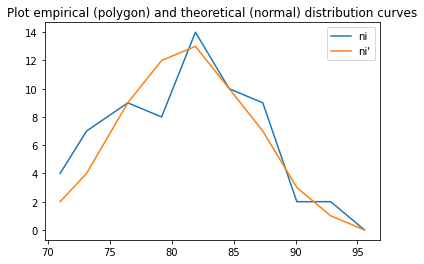

In [5]:
_,ax = plt.subplots()
ax.plot(data['xi'], data['ni'])
ax.plot(data['xi'], data["ni'"])
ax.legend(["ni", "ni'"])
ax.set_title('Plot empirical (polygon) and theoretical (normal) distribution curves')

**a**-**Пирсона**

In [8]:
pearson=pd.DataFrame(pd.read_excel("eli.xlsm",sheet_name="pears"))
display(pearson)
alpha=0.95
f=len(pearson)-2-1
KhiВ = pearson['(nk-npk)^2/npk'].values.sum()
Fchi2=chi2.ppf(alpha,f)
if KhiВ < Fchi2:
  print('Гипотеза H0 принимаем :' , KhiВ, '<', Fchi2)
else:
  print('Гипотеза H0 отклоняем :' , KhiВ , '>=', Fchi2)
print()

,ni,левая,правая,p,npk,(nk-npk)^2/npk
0,11,69.64,75.10,0.118791,7.721429,1.392
1,17,75.10,80.56,0.319833,20.789141,0.691
2,14,80.56,83.29,0.192429,12.507854,0.178
3,10,83.29,86.02,0.159788,10.386229,0.014
4,13,86.02,96.94,0.187893,12.213072,0.051


Гипотеза H0 принимаем : 2.3259999999999996 < 5.991464547107979



**б-Колмогорова**

In [21]:
kolmogorov =pd.DataFrame(pd.read_excel("eli.xlsm",sheet_name="kolm"))
display(kolmogorov)
lambdax=kolmogorov["|wi-wi'|"].values.max()/math.sqrt(n)
print()
print('lambda = ', round(lambdax,3),'\n') 
Klbd =0.9639          #по таблицы K(lambda)
print('Klambda =' , Klbd , ' >' , 0.05 ,'Это условие выполняется.')
print('Гипотезу о соответствии данного распределения нормальному закону распределения принимаем')

,xi,ni,ni',wi,wi',|wi-wi'|
0,71.00,4,2,4,2,2
1,73.73,7,5,11,7,4
2,76.46,9,9,20,16,4
3,79.19,8,12,28,28,0
4,81.92,14,13,42,41,1
5,84.65,10,10,52,51,1
6,87.36,9,7,61,58,3
7,90.11,2,3,63,61,2
8,92.84,2,1,65,62,3
9,95.57,0,0,65,62,3



lambda =  0.496 

Klambda = 0.9639  > 0.05 Это условие выполняется.
Гипотезу о соответствии данного распределения нормальному закону распределения принимаем


**в-Романовского**

In [22]:
if (abs(KhiВ - f)/(math.sqrt(2*f))) >= 3: #f voir dans pearson
  print('Гипотеза H0 отвергается , т.е. оно больше 3 :',abs(KhiВ - f)/(math.sqrt(2*f) ))
else:
  print('Гипотеза H0 не отвергается ,  т.е. оно меньше 3 :',abs(KhiВ - f)/(math.sqrt(2*f)))
print()

Гипотеза H0 не отвергается ,  т.е. оно меньше 3 : 0.1629999999999998



**г-Ястремского**

In [25]:
yastremski=pd.DataFrame(pd.read_excel("eli.xlsm", sheet_name="yes"))
display(yastremski)
print()
c=(yastremski['(ni-npi)^2']/yastremski['npi(1-pi)']).values.sum()
print('C =', c)
k=5
Teta=0.6
J=abs(c-k)
op=2*k+4*Teta
row= J/op
if (row < 3) :
  print(row,'<',3 ,': гипотеза о нормальном распределении экспериментальных данных принимается')
else:
  print(row,'>',3 ,': гипотеза о нормальном распределении экспериментальных данных не принимается')

,ni,левая,правая,pi,npi,(ni-npi)^2,npi(1-pi)
0,11,69.64,75.10,0.118791,7.721429,10.749027,6.804191
1,17,75.10,80.56,0.319833,20.789141,14.357587,14.140089
2,14,80.56,83.29,0.192429,12.507854,2.226498,10.100986
3,10,83.29,86.02,0.159788,10.386229,0.149173,8.726633
4,13,86.02,96.94,0.187893,12.213072,0.619256,9.918316



C = 2.8951005631601454
0.16974995458385925 < 3 : гипотеза о нормальном распределении экспериментальных данных принимается


**д-приближенный критерий**

In [27]:
As = 0.0039004352711844614 #Asymetrie 
Ex =-0.8026946873478229   #Express 
alpha=0.05
k=2 #Число степеней свободы
chi2_choose=5.9915 #table khi
Sas=np.sqrt((6*(n-1))/((n+1)*(n+3)))
print('Sas =',Sas)
Sex=np.sqrt((24*n*(n-2)*(n-5))/((n-1)^2*(n+3)*(n+5)))
print('Sex =',Sex)
chi2_crit=(As**2/Sas**2)+(Ex**2/Sex**2)
print('chi2_crit =',chi2_crit)
print()
if chi2_choose < chi2_crit:
  print('Гипотезу о нормальном распределении выборочной совокупности принимаем ',chi2_choose,'<',chi2_crit)
else:
  print('Гипотезу о нормальном распределении выборочной')

Sas = 0.29250896965085227
Sex = 24.80474670498567
chi2_crit = 0.0012250102963206131

Гипотезу о нормальном распределении выборочной
